In [1]:
# Initial Imports
import requests
import pandas as pd
import json
import numpy as np
from datetime import datetime
from datetime import timedelta

In [2]:
# Import API Key
from config import key

# Documentation:
#https://www.worldweatheronline.com/developer/my/analytics.aspx?key_id=222419

In [3]:
# Make a request to the worldweatheronline local history weather API page
def makeARequest(location, startDate, endDate, yourAPIKey):
    baseURL = "http://api.worldweatheronline.com/premium/v1/past-weather.ashx"
    timeInterval = "1"
    outputFormatToReturn = "json"

    requestURL = f"{baseURL}?q={location}&date={startDate}&enddate={endDate}&tp={timeInterval}&format={outputFormatToReturn}&key={yourAPIKey}"
    
    response = requests.get(requestURL)

    if response.status_code == 200:
        responseJson = response.json()
        return responseJson
    else:
        return print(response.status_code)

In [4]:
# Pull the wind variables from the responseJson 
def monthlyHistoricalWeather(firstDayOfMonth, lastDayOfMonth, jsonResponse):
    
    first = datetime.strptime(firstDayOfMonth, '%Y-%m-%d')
    last = datetime.strptime(lastDayOfMonth, '%Y-%m-%d')
    numberOfDays = last.day - first.day

    HourlyHistoricalWeather = []
    
    for day in np.arange(0,numberOfDays + 1,1):
        for hour in np.arange(0,24,1):
            HourlyHistoricalWeather.append({
                "Date" : jsonResponse["data"]["weather"][day]["date"],
                "Time" : jsonResponse["data"]["weather"][day]["hourly"][hour]["time"],
                "WindSpeed(mph)" : jsonResponse["data"]["weather"][day]["hourly"][hour]["windspeedMiles"],
                "WindDirection(Degrees)" : jsonResponse["data"]["weather"][day]["hourly"][hour]["winddirDegree"],
                "WindDirection(Compass)" : jsonResponse["data"]["weather"][day]["hourly"][hour]["winddir16Point"],
                "WindGust(mph)" : jsonResponse["data"]["weather"][day]["hourly"][hour]["WindGustMiles"]
            })

    return HourlyHistoricalWeather

In [5]:

# Store the variables in a DataFrame
def monthlyHistoricalWeatherDF(month):
    weatherDataFrame = pd.DataFrame(month)
    return weatherDataFrame

In [6]:
# Define the Latitude and longitude of Hackberry Wind Farm
    # https://www.thewindpower.net/windfarm_en_4012_hackberry.php
    # Latitude: 32.776111
    # Longitude: -99.476444
latLong = "32.776111,-99.476444"

In [7]:
# January
date = "2019-01-01"
enddate = "2019-01-31"

responseJson = makeARequest(latLong, date, enddate, key)

January = monthlyHistoricalWeather(date, enddate, responseJson)
JanuaryDF = monthlyHistoricalWeatherDF(January)
JanuaryDF.head()

,Date,Time,WindSpeed(mph),WindDirection(Degrees),WindDirection(Compass),WindGust(mph)
0,2019-01-01,0,12,126,SE,24
1,2019-01-01,100,13,89,E,23
2,2019-01-01,200,14,53,NE,23
3,2019-01-01,300,15,17,NNE,22
4,2019-01-01,400,14,18,NNE,21


In [8]:
# February
date = "2019-02-01"
enddate = "2019-02-28"

responseJson = makeARequest(latLong, date, enddate, key)

February = monthlyHistoricalWeather(date, enddate, responseJson)
FebruaryDF = monthlyHistoricalWeatherDF(February)

In [9]:

# March
date = "2019-03-01"
enddate = "2019-03-31"

responseJson = makeARequest(latLong, date, enddate, key)

March = monthlyHistoricalWeather(date, enddate, responseJson)
MarchDF = monthlyHistoricalWeatherDF(March)

In [10]:
# April
date = "2019-04-01"
enddate = "2019-04-30"

responseJson = makeARequest(latLong, date, enddate, key)

April = monthlyHistoricalWeather(date, enddate, responseJson)
AprilDF = monthlyHistoricalWeatherDF(April)

In [11]:

# May
date = "2019-05-01"
enddate = "2019-05-31"

responseJson = makeARequest(latLong, date, enddate, key)

May = monthlyHistoricalWeather(date, enddate, responseJson)
MayDF = monthlyHistoricalWeatherDF(May)

In [12]:
# June
date = "2019-06-01"
enddate = "2019-06-30"

responseJson = makeARequest(latLong, date, enddate, key)

June = monthlyHistoricalWeather(date, enddate, responseJson)
JuneDF = monthlyHistoricalWeatherDF(June)

In [13]:

# July
date = "2019-07-01"
enddate = "2019-07-31"

responseJson = makeARequest(latLong, date, enddate, key)

July = monthlyHistoricalWeather(date, enddate, responseJson)
JulyDF = monthlyHistoricalWeatherDF(July)

In [14]:
# August
date = "2019-08-01"
enddate = "2019-08-31"

responseJson = makeARequest(latLong, date, enddate, key)

August = monthlyHistoricalWeather(date, enddate, responseJson)
AugustDF = monthlyHistoricalWeatherDF(August)

In [15]:
# September
date = "2019-09-01"
enddate = "2019-09-30"

responseJson = makeARequest(latLong, date, enddate, key)

September = monthlyHistoricalWeather(date, enddate, responseJson)
SeptemberDF = monthlyHistoricalWeatherDF(September)

In [16]:
# October
date = "2019-10-01"
enddate = "2019-10-31"

responseJson = makeARequest(latLong, date, enddate, key)

October = monthlyHistoricalWeather(date, enddate, responseJson)
OctoberDF = monthlyHistoricalWeatherDF(October)

In [17]:
# November
date = "2019-11-01"
enddate = "2019-11-30"

responseJson = makeARequest(latLong, date, enddate, key)

November = monthlyHistoricalWeather(date, enddate, responseJson)
NovemberDF = monthlyHistoricalWeatherDF(November)

In [18]:
# December
date = "2019-12-01"
enddate = "2019-12-31"

responseJson = makeARequest(latLong, date, enddate, key)

December = monthlyHistoricalWeather(date, enddate, responseJson)
DecemberDF = monthlyHistoricalWeatherDF(December)

In [19]:
# Combine each month into a single DataFrame
hourlyWeatherDF2019 = JanuaryDF.append([FebruaryDF, MarchDF, AprilDF, MayDF, JuneDF, JulyDF, AugustDF, SeptemberDF, OctoberDF, NovemberDF, DecemberDF]) 
index = np.arange(0,24*365,1)
hourlyWeatherDF2019 = hourlyWeatherDF2019.set_index(index)
hourlyWeatherDF2019

,Date,Time,WindSpeed(mph),WindDirection(Degrees),WindDirection(Compass),WindGust(mph)
0,2019-01-01,0,12,126,SE,24
1,2019-01-01,100,13,89,E,23
2,2019-01-01,200,14,53,NE,23
3,2019-01-01,300,15,17,NNE,22
4,2019-01-01,400,14,18,NNE,21
...,...,...,...,...,...,...
8755,2019-12-31,1900,6,175,S,12
8756,2019-12-31,2000,6,176,S,13
8757,2019-12-31,2100,7,176,S,14
8758,2019-12-31,2200,7,176,S,15


In [20]:
hourlyWeatherDF2019.dtypes

Date                      object
Time                      object
WindSpeed(mph)            object
WindDirection(Degrees)    object
WindDirection(Compass)    object
WindGust(mph)             object
dtype: object

# Performing ETL on Wind Data at Hackberry Wind Farm

In [21]:
#hourlyWeatherDF2019['Time'] = hourlyWeatherDF2019['Time'].astype(str).astype(np.int64)

In [22]:
hourlyWeatherDF2019['Date'] = pd.to_datetime(hourlyWeatherDF2019['Date'] )

In [23]:
hourlyWeatherDF2019.dtypes

Date                      datetime64[ns]
Time                              object
WindSpeed(mph)                    object
WindDirection(Degrees)            object
WindDirection(Compass)            object
WindGust(mph)                     object
dtype: object

In [24]:
hourlyWeatherDF2019['Time'] = hourlyWeatherDF2019['Time'].astype(int)

In [25]:
hourlyWeatherDF2019.dtypes

Date                      datetime64[ns]
Time                               int32
WindSpeed(mph)                    object
WindDirection(Degrees)            object
WindDirection(Compass)            object
WindGust(mph)                     object
dtype: object

In [26]:
hourlyWeatherDF2019['Time'] = hourlyWeatherDF2019['Time']/100

In [27]:
hourlyWeatherDF2019['Time'] = hourlyWeatherDF2019['Time'].astype(int)

In [28]:
hourlyWeatherDF2019['time'] =pd.to_timedelta(hourlyWeatherDF2019['Time'], unit='h')

In [29]:
# Creating new column called 'hour' in timedelta format without date
hourlyWeatherDF2019['time'] = hourlyWeatherDF2019['time'] - pd.to_timedelta(hourlyWeatherDF2019['time'].dt.days, unit='d')

In [30]:
hourlyWeatherDF2019

,Date,Time,WindSpeed(mph),WindDirection(Degrees),WindDirection(Compass),WindGust(mph),time
0,2019-01-01,0,12,126,SE,24,00:00:00
1,2019-01-01,1,13,89,E,23,01:00:00
2,2019-01-01,2,14,53,NE,23,02:00:00
3,2019-01-01,3,15,17,NNE,22,03:00:00
4,2019-01-01,4,14,18,NNE,21,04:00:00
...,...,...,...,...,...,...,...
8755,2019-12-31,19,6,175,S,12,19:00:00
8756,2019-12-31,20,6,176,S,13,20:00:00
8757,2019-12-31,21,7,176,S,14,21:00:00
8758,2019-12-31,22,7,176,S,15,22:00:00


In [31]:
hourlyWeatherDF2019.dtypes

Date                       datetime64[ns]
Time                                int32
WindSpeed(mph)                     object
WindDirection(Degrees)             object
WindDirection(Compass)             object
WindGust(mph)                      object
time                      timedelta64[ns]
dtype: object

In [32]:
# Combining Date and hour to a single column as they are in datetime and timedelta formats
hourlyWeatherDF2019['time_combined'] = hourlyWeatherDF2019['Date'] + hourlyWeatherDF2019['time']

In [33]:
hourlyWeatherDF2019

,Date,Time,WindSpeed(mph),WindDirection(Degrees),WindDirection(Compass),WindGust(mph),time,time_combined
0,2019-01-01,0,12,126,SE,24,00:00:00,2019-01-01 00:00:00
1,2019-01-01,1,13,89,E,23,01:00:00,2019-01-01 01:00:00
2,2019-01-01,2,14,53,NE,23,02:00:00,2019-01-01 02:00:00
3,2019-01-01,3,15,17,NNE,22,03:00:00,2019-01-01 03:00:00
4,2019-01-01,4,14,18,NNE,21,04:00:00,2019-01-01 04:00:00
...,...,...,...,...,...,...,...,...
8755,2019-12-31,19,6,175,S,12,19:00:00,2019-12-31 19:00:00
8756,2019-12-31,20,6,176,S,13,20:00:00,2019-12-31 20:00:00
8757,2019-12-31,21,7,176,S,14,21:00:00,2019-12-31 21:00:00
8758,2019-12-31,22,7,176,S,15,22:00:00,2019-12-31 22:00:00


In [34]:
hourlyWeatherDF2019.dtypes

Date                       datetime64[ns]
Time                                int32
WindSpeed(mph)                     object
WindDirection(Degrees)             object
WindDirection(Compass)             object
WindGust(mph)                      object
time                      timedelta64[ns]
time_combined              datetime64[ns]
dtype: object

In [35]:
hourlyWeatherDF2019

,Date,Time,WindSpeed(mph),WindDirection(Degrees),WindDirection(Compass),WindGust(mph),time,time_combined
0,2019-01-01,0,12,126,SE,24,00:00:00,2019-01-01 00:00:00
1,2019-01-01,1,13,89,E,23,01:00:00,2019-01-01 01:00:00
2,2019-01-01,2,14,53,NE,23,02:00:00,2019-01-01 02:00:00
3,2019-01-01,3,15,17,NNE,22,03:00:00,2019-01-01 03:00:00
4,2019-01-01,4,14,18,NNE,21,04:00:00,2019-01-01 04:00:00
...,...,...,...,...,...,...,...,...
8755,2019-12-31,19,6,175,S,12,19:00:00,2019-12-31 19:00:00
8756,2019-12-31,20,6,176,S,13,20:00:00,2019-12-31 20:00:00
8757,2019-12-31,21,7,176,S,14,21:00:00,2019-12-31 21:00:00
8758,2019-12-31,22,7,176,S,15,22:00:00,2019-12-31 22:00:00


In [36]:
hourlyWeatherDF2019.dtypes

Date                       datetime64[ns]
Time                                int32
WindSpeed(mph)                     object
WindDirection(Degrees)             object
WindDirection(Compass)             object
WindGust(mph)                      object
time                      timedelta64[ns]
time_combined              datetime64[ns]
dtype: object

In [37]:
# Dropping the original 'Time' column from 
hourlyWeatherDF2019 = hourlyWeatherDF2019.drop(['Time', 'Date', 'time'], 1)

In [38]:
# Renaming column names.
hourlyWeatherDF2019.rename(columns = {'time_combined':'time', 'WindSpeed(mph)':'WindSpeed_mph', 'WindDirection(Degrees)':'WindDirection_degrees', 'WindDirection(Compass)':'WindDirection_compass', 'WindGust(mph)':'WindGust_mph'}, inplace = True)

In [39]:
# Re-arranging the column headers
hourlyWeatherDF2019 = hourlyWeatherDF2019[['time', 'WindSpeed_mph', 'WindDirection_degrees', 'WindDirection_compass', 'WindGust_mph']]

In [40]:
hourlyWeatherDF2019['WindSpeed_mph'] = hourlyWeatherDF2019['WindSpeed_mph'].astype(int)

In [41]:
hourlyWeatherDF2019['WindDirection_degrees'] = hourlyWeatherDF2019['WindDirection_degrees'].astype(int)

In [42]:
hourlyWeatherDF2019['WindGust_mph'] = hourlyWeatherDF2019['WindGust_mph'].astype(int)

In [43]:
weather2019Clean = hourlyWeatherDF2019.drop(hourlyWeatherDF2019.index[0])

In [44]:
weather2019Clean.copy()

,time,WindSpeed_mph,WindDirection_degrees,WindDirection_compass,WindGust_mph
1,2019-01-01 01:00:00,13,89,E,23
2,2019-01-01 02:00:00,14,53,NE,23
3,2019-01-01 03:00:00,15,17,NNE,22
4,2019-01-01 04:00:00,14,18,NNE,21
5,2019-01-01 05:00:00,14,19,NNE,20
...,...,...,...,...,...
8755,2019-12-31 19:00:00,6,175,S,12
8756,2019-12-31 20:00:00,6,176,S,13
8757,2019-12-31 21:00:00,7,176,S,14
8758,2019-12-31 22:00:00,7,176,S,15


# Importing and Performing ETL on Hackberry Wind Energy Data

In [45]:
data = "Resources/Hackberry_Generation.csv"
Hackberry_df = pd.read_csv(data)
Hackberry_df

,Unit,Date,Hour Ending,MWH
0,HWF_HWFG1,20190101,100,110.487950
1,HWF_HWFG1,20190101,200,72.020225
2,HWF_HWFG1,20190101,300,67.639475
3,HWF_HWFG1,20190101,400,63.718900
4,HWF_HWFG1,20190101,500,61.264250
...,...,...,...,...
13866,HWF_HWFG1,20200731,2000,4.998600
13867,HWF_HWFG1,20200731,2100,16.390275
13868,HWF_HWFG1,20200731,2200,20.637800
13869,HWF_HWFG1,20200731,2300,13.998975


In [46]:
Hackberry_df.dtypes

Unit            object
Date             int64
Hour Ending     object
MWH            float64
dtype: object

In [47]:
# Dropping Unit Column
Hackberry_df = Hackberry_df.drop('Unit', 1)

In [48]:
# Renaming column name from 'Hour Ending' to 'Hour'
Hackberry_df.rename(columns = {'Hour Ending':'Hour'}, inplace = True)

In [49]:
# Converting Date to datetime
Hackberry_df['Date'] = pd.to_datetime(Hackberry_df['Date'], format='%Y%m%d')

In [50]:
# Checking data type
Hackberry_df.dtypes

Date    datetime64[ns]
Hour            object
MWH            float64
dtype: object

In [51]:
Hackberry_df

,Date,Hour,MWH
0,2019-01-01,100,110.487950
1,2019-01-01,200,72.020225
2,2019-01-01,300,67.639475
3,2019-01-01,400,63.718900
4,2019-01-01,500,61.264250
...,...,...,...
13866,2020-07-31,2000,4.998600
13867,2020-07-31,2100,16.390275
13868,2020-07-31,2200,20.637800
13869,2020-07-31,2300,13.998975


In [52]:
# Removing the last two characters from the hour column as the times are hourly
Hackberry_df['Hour'] = Hackberry_df['Hour'].astype(str).str[:-2].astype(np.int64)

In [53]:
# Checking Hour data type
Hackberry_df.dtypes

Date    datetime64[ns]
Hour             int64
MWH            float64
dtype: object

In [54]:
Hackberry_df['hour'] =pd.to_timedelta(Hackberry_df['Hour'], unit='h')

In [55]:
# Creating new column called 'hour' in timedelta format without date
Hackberry_df['hour'] = Hackberry_df['hour'] - pd.to_timedelta(Hackberry_df['hour'].dt.days, unit='d')

In [56]:
# Dropping the original 'Hour' column
Hackberry_df = Hackberry_df.drop('Hour', 1)

In [57]:
# Re-arranging the column headers
Hackberry_df = Hackberry_df[["Date", "hour", "MWH"]]

In [58]:
Hackberry_df.dtypes

Date     datetime64[ns]
hour    timedelta64[ns]
MWH             float64
dtype: object

In [59]:
# Combining Date and hour to a single column as they are in datetime and timedelta formats
Hackberry_df['time'] = Hackberry_df['Date'] + Hackberry_df['hour']

In [60]:
# Re-arranging the column headers and removing the Date and hour columns
Hackberry_df = Hackberry_df[["time", "MWH"]]

In [61]:
Hackberry_df.dtypes

time    datetime64[ns]
MWH            float64
dtype: object

In [62]:
Hackberry_df.copy()

,time,MWH
0,2019-01-01 01:00:00,110.487950
1,2019-01-01 02:00:00,72.020225
2,2019-01-01 03:00:00,67.639475
3,2019-01-01 04:00:00,63.718900
4,2019-01-01 05:00:00,61.264250
...,...,...
13866,2020-07-31 20:00:00,4.998600
13867,2020-07-31 21:00:00,16.390275
13868,2020-07-31 22:00:00,20.637800
13869,2020-07-31 23:00:00,13.998975


In [63]:
# Removing rows to include only 2019 year data to include same time range as wind data
Hackberry2019 = Hackberry_df.drop(Hackberry_df.index[8759:13871])

## Merging Hackberry Energy Data with Wind Data

In [64]:
hackberryWindMWH = pd.merge(weather2019Clean, Hackberry2019, on='time', how='outer')

In [65]:
hackberryWindMWH =hackberryWindMWH.drop(hackberryWindMWH.index[8760])

In [66]:
hackberryWindMWH.copy()

,time,WindSpeed_mph,WindDirection_degrees,WindDirection_compass,WindGust_mph,MWH
0,2019-01-01 01:00:00,13.0,89.0,E,23.0,110.487950
1,2019-01-01 02:00:00,14.0,53.0,NE,23.0,72.020225
2,2019-01-01 03:00:00,15.0,17.0,NNE,22.0,67.639475
3,2019-01-01 04:00:00,14.0,18.0,NNE,21.0,63.718900
4,2019-01-01 05:00:00,14.0,19.0,NNE,20.0,61.264250
...,...,...,...,...,...,...
8755,2019-12-31 19:00:00,6.0,175.0,S,12.0,15.506725
8756,2019-12-31 20:00:00,6.0,176.0,S,13.0,32.191125
8757,2019-12-31 21:00:00,7.0,176.0,S,14.0,40.677250
8758,2019-12-31 22:00:00,7.0,176.0,S,15.0,45.826475


## Linear Regression

In [67]:
import warnings
warnings.filterwarnings('ignore')

In [68]:
from pathlib import Path
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [69]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

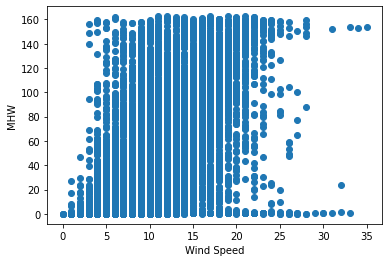

In [70]:
# Visually inspect the data
plt.scatter(hackberryWindMWH.WindSpeed_mph, hackberryWindMWH.MWH)
plt.xlabel('Wind Speed')
plt.ylabel('MHW')
plt.show()

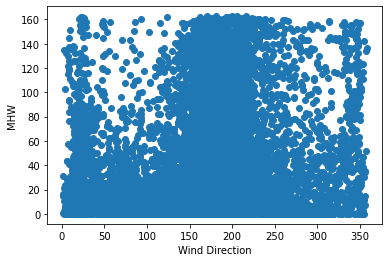

In [71]:
# Visually inspect the data
plt.scatter(hackberryWindMWH.WindDirection_degrees, hackberryWindMWH.MWH)
plt.xlabel('Wind Direction')
plt.ylabel('MHW')
plt.show()

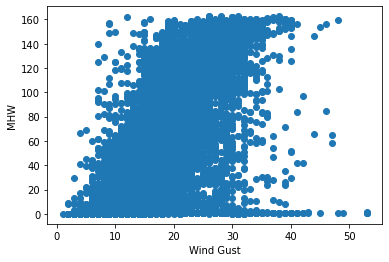

In [72]:
# Visually inspect the data
plt.scatter(hackberryWindMWH.WindGust_mph, hackberryWindMWH.MWH)
plt.xlabel('Wind Gust')
plt.ylabel('MHW')
plt.show()

##  It can be concluded that linear regression on wind speed alone does not track the power generated.  Direction of wind needs to be included.

In [73]:
# Creating dataframe with wind direction blowing east
windEast = hackberryWindMWH[hackberryWindMWH.WindDirection_compass == 'E']

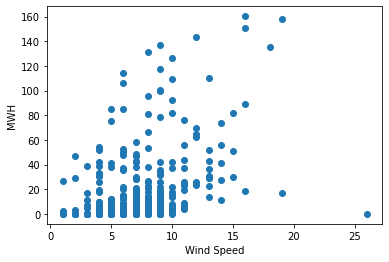

In [74]:
# Visually inspect the data of wind speed to MWH for winds blowing east.
plt.scatter(windEast.WindSpeed_mph, windEast.MWH)
plt.xlabel('Wind Speed')
plt.ylabel('MWH')
plt.show()

In [75]:
# Creating dataframe with wind direction blowing West
windWest = hackberryWindMWH[hackberryWindMWH.WindDirection_compass == 'W']

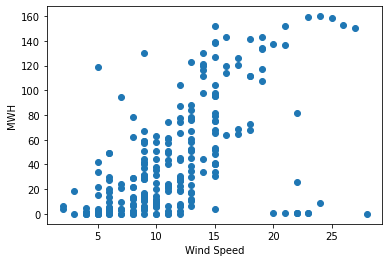

In [76]:
# Visually inspect the data of wind speed to MWH for winds blowing West.
plt.scatter(windWest.WindSpeed_mph, windWest.MWH)
plt.xlabel('Wind Speed')
plt.ylabel('MWH')
plt.show()

In [77]:
# Creating dataframe with wind direction blowing south
windSouth = hackberryWindMWH[hackberryWindMWH.WindDirection_compass == 'S']

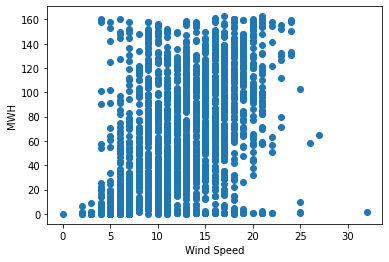

In [78]:
# Visually inspect the data of wind speed to MWH for winds blowing South.
plt.scatter(windSouth.WindSpeed_mph, windSouth.MWH)
plt.xlabel('Wind Speed')
plt.ylabel('MWH')
plt.show()

In [79]:
# Creating dataframe with wind direction blowing North
windNorth = hackberryWindMWH[hackberryWindMWH.WindDirection_compass == 'N']

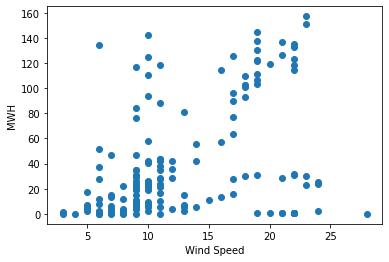

In [80]:
# Visually inspect the data of wind speed to MWH for winds blowing North.
plt.scatter(windNorth.WindSpeed_mph, windNorth.MWH)
plt.xlabel('Wind Speed')
plt.ylabel('MWH')
plt.show()

In [81]:
# Creating dataframe with wind direction blowing NE
windNE = hackberryWindMWH[hackberryWindMWH.WindDirection_compass == 'NE']

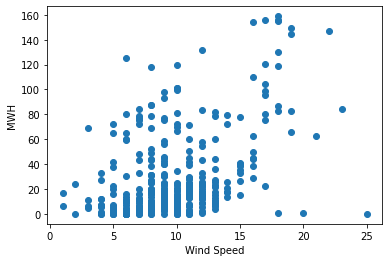

In [82]:
# Visually inspect the data of wind speed to MWH for winds blowing NE.
plt.scatter(windNE.WindSpeed_mph, windNE.MWH)
plt.xlabel('Wind Speed')
plt.ylabel('MWH')
plt.show()

In [83]:
# Creating dataframe with wind direction blowing NW
windNW = hackberryWindMWH[hackberryWindMWH.WindDirection_compass == 'NW']

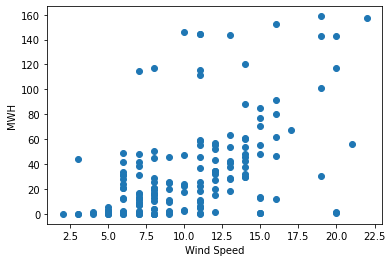

In [84]:
# Visually inspect the data of wind speed to MWH for winds blowing NW.
plt.scatter(windNW.WindSpeed_mph, windNW.MWH)
plt.xlabel('Wind Speed')
plt.ylabel('MWH')
plt.show()

In [85]:
# Creating dataframe with wind direction blowing NNE
windNNE = hackberryWindMWH[hackberryWindMWH.WindDirection_compass == 'NNE']

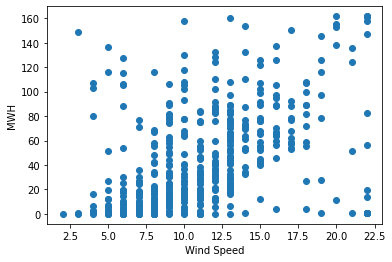

In [86]:
# Visually inspect the data of wind speed to MWH for winds blowing NNE.
plt.scatter(windNNE.WindSpeed_mph, windNNE.MWH)
plt.xlabel('Wind Speed')
plt.ylabel('MWH')
plt.show()

In [87]:
# Creating dataframe with wind direction blowing NNW
windNNW = hackberryWindMWH[hackberryWindMWH.WindDirection_compass == 'NNW']

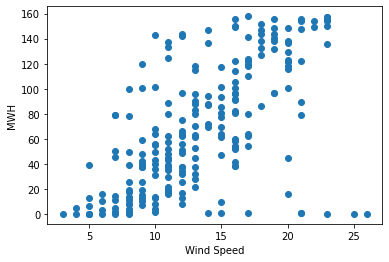

In [88]:
# Visually inspect the data of wind speed to MWH for winds blowing NNW.
plt.scatter(windNNW.WindSpeed_mph, windNNW.MWH)
plt.xlabel('Wind Speed')
plt.ylabel('MWH')
plt.show()

In [89]:
# Converting wind direction into 0, 1.
hackberryWindMWH_Encoded = pd.get_dummies(hackberryWindMWH, columns=["WindDirection_compass"])

In [90]:
hackberryWindMWH_Encoded

,time,WindSpeed_mph,WindDirection_degrees,WindGust_mph,MWH,WindDirection_compass_E,WindDirection_compass_ENE,WindDirection_compass_ESE,WindDirection_compass_N,WindDirection_compass_NE,...,WindDirection_compass_NNW,WindDirection_compass_NW,WindDirection_compass_S,WindDirection_compass_SE,WindDirection_compass_SSE,WindDirection_compass_SSW,WindDirection_compass_SW,WindDirection_compass_W,WindDirection_compass_WNW,WindDirection_compass_WSW
0,2019-01-01 01:00:00,13.0,89.0,23.0,110.487950,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2019-01-01 02:00:00,14.0,53.0,23.0,72.020225,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2019-01-01 03:00:00,15.0,17.0,22.0,67.639475,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2019-01-01 04:00:00,14.0,18.0,21.0,63.718900,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2019-01-01 05:00:00,14.0,19.0,20.0,61.264250,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2019-12-31 19:00:00,6.0,175.0,12.0,15.506725,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8756,2019-12-31 20:00:00,6.0,176.0,13.0,32.191125,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8757,2019-12-31 21:00:00,7.0,176.0,14.0,40.677250,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8758,2019-12-31 22:00:00,7.0,176.0,15.0,45.826475,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
